In [2]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the data into a Pandas DataFrame
df = pd.read_csv("Resources/Claims_data_raw.csv")

df.head()


,Reporting Date,Company Name,ABN,Subject,Channel Type,Cover Type,Category,Data item,Calculation Basis,Value,Unit,Notes,Unnamed: 12,Unnamed: 13
0,30/06/2023,AIA Australia Limited,79004837861,Claims,Individual Non-Advised,Accident,Total Claims Received,Number of claims,Flow (12 months),*,Number,Data have been masked as the sample size is to...,NaN,NaN
1,30/06/2023,AIA Australia Limited,79004837861,Claims,Individual Non-Advised,Accident,Finalised Claims,Number of claims,Flow (12 months),*,Number,Data have been masked as the sample size is to...,NaN,NaN
2,30/06/2023,AIA Australia Limited,79004837861,Claims,Individual Non-Advised,Accident,Finalised Claims - Admitted,Number of claims,Flow (12 months),*,Number,Data have been masked as the sample size is to...,NaN,NaN
3,30/06/2023,AIA Australia Limited,79004837861,Claims,Individual Non-Advised,Accident,Finalised Claims - Declined,Number of claims,Flow (12 months),*,Number,Data have been masked as the sample size is to...,NaN,NaN
4,30/06/2023,AIA Australia Limited,79004837861,Claims,Individual Non-Advised,Accident,Withdrawn Claims,Number of claims,Flow (12 months),*,Number,Data have been masked as the sample size is to...,NaN,NaN


In [4]:
# View unique values in the 'Subject' column
df['Subject'].unique()

array(['Claims', 'Claims Duration'], dtype=object)

In [5]:
# Filter the 'Subject' column for 'claims duration'
df = df[df['Subject'] == 'Claims Duration']

# Confirm that the 'Subject' column has been filtered
df['Subject'].unique()

array(['Claims Duration'], dtype=object)

In [6]:
# View unique values in the 'Data item' column
df['Data item'].unique()

array(['Total finalised claims', 'Est. average duration', '0-2 weeks',
       '> 6 months to 12 months', '> 2 weeks to 2 months',
       '> 2 months to 6 months', '> 12 months'], dtype=object)

In [7]:
# Remove the 'Est. average duration' and 'Total finalised claims' values in the 'Data item' column
remove_list = ['Est. average duration', 'Total finalised claims']
df = df[~df['Data item'].isin(remove_list)]

# Confirm that the 'Data item' column has been filtered
df['Data item'].unique()

array(['0-2 weeks', '> 6 months to 12 months', '> 2 weeks to 2 months',
       '> 2 months to 6 months', '> 12 months'], dtype=object)

In [8]:
# Remove the null values in the 'Value' column
df = df[~(df['Value'] == '*')]
df.head()

,Reporting Date,Company Name,ABN,Subject,Channel Type,Cover Type,Category,Data item,Calculation Basis,Value,Unit,Notes,Unnamed: 12,Unnamed: 13
349,30/06/2023,AIA Australia Limited,79004837861,Claims Duration,Individual Non-Advised,CCI,NaN,0-2 weeks,Flow (12 months),50.3,%,NaN,NaN,NaN
350,30/06/2023,AIA Australia Limited,79004837861,Claims Duration,Individual Non-Advised,CCI,NaN,> 6 months to 12 months,Flow (12 months),2.8,%,NaN,NaN,NaN
351,30/06/2023,AIA Australia Limited,79004837861,Claims Duration,Individual Non-Advised,CCI,NaN,> 2 weeks to 2 months,Flow (12 months),36.8,%,NaN,NaN,NaN
352,30/06/2023,AIA Australia Limited,79004837861,Claims Duration,Individual Non-Advised,CCI,NaN,> 2 months to 6 months,Flow (12 months),9.7,%,NaN,NaN,NaN
353,30/06/2023,AIA Australia Limited,79004837861,Claims Duration,Individual Non-Advised,CCI,NaN,> 12 months,Flow (12 months),0.3,%,NaN,NaN,NaN


In [9]:
# Remove irrelevant columns in the dataframe
clean_df = df[['Reporting Date','Company Name','Channel Type','Cover Type','Data item','Value']]
clean_df.head()

,Reporting Date,Company Name,Channel Type,Cover Type,Data item,Value
349,30/06/2023,AIA Australia Limited,Individual Non-Advised,CCI,0-2 weeks,50.3
350,30/06/2023,AIA Australia Limited,Individual Non-Advised,CCI,> 6 months to 12 months,2.8
351,30/06/2023,AIA Australia Limited,Individual Non-Advised,CCI,> 2 weeks to 2 months,36.8
352,30/06/2023,AIA Australia Limited,Individual Non-Advised,CCI,> 2 months to 6 months,9.7
353,30/06/2023,AIA Australia Limited,Individual Non-Advised,CCI,> 12 months,0.3


In [10]:
clean_df.dtypes

Reporting Date    object
Company Name      object
Channel Type      object
Cover Type        object
Data item         object
Value             object
dtype: object

In [11]:
# Convert the 'Value' column to float
clean_df['Value'] = clean_df['Value'].astype(float)

# Convert the 'Reporting Date' column to date type
clean_df['Reporting Date'] = pd.to_datetime(clean_df['Reporting Date'])

#Rename column name 'Data item'
clean_df = clean_df.rename(columns={'Data item': 'Duration_bucket'})

C:\Users\Evie Chanthy\AppData\Local\Temp\ipykernel_10308\15460499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Value'] = clean_df['Value'].astype(float)
C:\Users\Evie Chanthy\AppData\Local\Temp\ipykernel_10308\15460499.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  clean_df['Reporting Date'] = pd.to_datetime(clean_df['Reporting Date'])
C:\Users\Evie Chanthy\AppData\Local\Temp\ipykernel_10308\15460499.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [12]:
clean_df.dtypes

Reporting Date     datetime64[ns]
Company Name               object
Channel Type               object
Cover Type                 object
Duration_bucket            object
Value                     float64
dtype: object

In [13]:
clean_df.head()

,Reporting Date,Company Name,Channel Type,Cover Type,Duration_bucket,Value
349,2023-06-30,AIA Australia Limited,Individual Non-Advised,CCI,0-2 weeks,50.3
350,2023-06-30,AIA Australia Limited,Individual Non-Advised,CCI,> 6 months to 12 months,2.8
351,2023-06-30,AIA Australia Limited,Individual Non-Advised,CCI,> 2 weeks to 2 months,36.8
352,2023-06-30,AIA Australia Limited,Individual Non-Advised,CCI,> 2 months to 6 months,9.7
353,2023-06-30,AIA Australia Limited,Individual Non-Advised,CCI,> 12 months,0.3


In [14]:
### Preliminary analysis of data
current_df = clean_df.loc[(clean_df["Reporting Date"] >= "2023-06-30")]  
current_df.head()


,Reporting Date,Company Name,Channel Type,Cover Type,Duration_bucket,Value
349,2023-06-30,AIA Australia Limited,Individual Non-Advised,CCI,0-2 weeks,50.3
350,2023-06-30,AIA Australia Limited,Individual Non-Advised,CCI,> 6 months to 12 months,2.8
351,2023-06-30,AIA Australia Limited,Individual Non-Advised,CCI,> 2 weeks to 2 months,36.8
352,2023-06-30,AIA Australia Limited,Individual Non-Advised,CCI,> 2 months to 6 months,9.7
353,2023-06-30,AIA Australia Limited,Individual Non-Advised,CCI,> 12 months,0.3


In [15]:
count = current_df.groupby('Reporting Date').size().reset_index(name='Count')
print(count)

  Reporting Date  Count
0     2023-06-30    620


Preliminary analysis of data

In [16]:
clean_df['Company Name'].unique()

array(['AIA Australia Limited',
       'Allianz Australia Life Insurance Limited',
       'ClearView Life Assurance Limited',
       'H C F Life Insurance Company Pty Ltd',
       'Hallmark Life Insurance Company Ltd.',
       'Hannover Life Re of Australasia Ltd',
       'Integrity Life Australia Limited', 'MetLife Insurance Limited',
       'MLC Limited', 'NobleOak Life Limited', 'QInsure Limited',
       'Resolution Life Australasia Limited',
       "St Andrew's Life Insurance Pty Ltd",
       'Swiss Re Life & Health Australia Limited',
       'TAL Life Insurance Services Limited', 'TAL Life Limited', 'Total',
       'Zurich Australia Limited', 'OnePath Life Limited',
       'Westpac Life Insurance Services Limited',
       'Asteron Life & Superannuation Limited',
       'The Colonial Mutual Life Assurance Society Limited'], dtype=object)

In [17]:
# pie chart for total claim duration for individual non-advised channel and funeral cover
ind_funeral_df = current_df[
    current_df['Company Name'].isin(['Total']) &
    current_df['Channel Type'].isin(['Individual Non-Advised']) &
    current_df['Cover Type'].isin(['Funeral'])
]
ind_funeral_df

,Reporting Date,Company Name,Channel Type,Cover Type,Duration_bucket,Value
4756,2023-06-30,Total,Individual Non-Advised,Funeral,0-2 weeks,83.3
4757,2023-06-30,Total,Individual Non-Advised,Funeral,> 6 months to 12 months,0.4
4758,2023-06-30,Total,Individual Non-Advised,Funeral,> 2 weeks to 2 months,13.8
4759,2023-06-30,Total,Individual Non-Advised,Funeral,> 2 months to 6 months,2.4
4760,2023-06-30,Total,Individual Non-Advised,Funeral,> 12 months,0.1


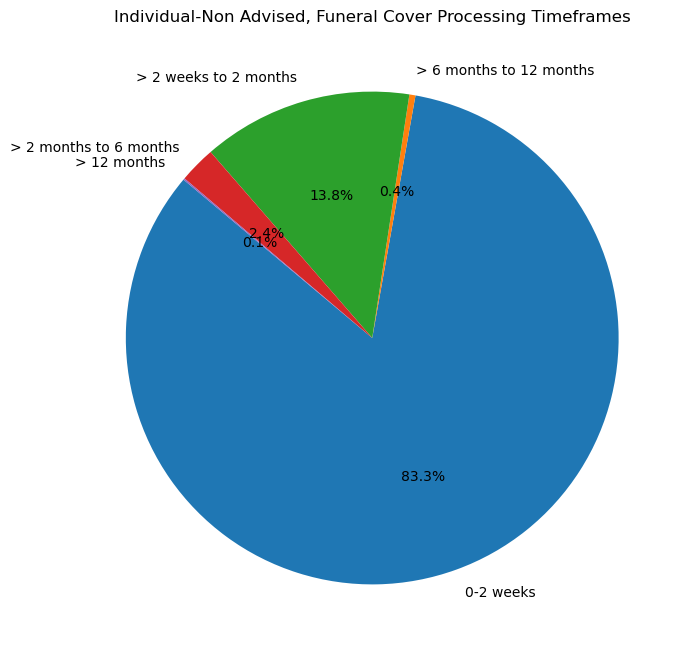

In [43]:
# plot the pie chart
plt.figure(figsize=(8, 8)) 
plt.pie(ind_funeral_df['Value'], labels=ind_funeral_df['Duration_bucket'], autopct='%1.1f%%', startangle=140)
plt.title('Individual-Non Advised, Funeral Cover Processing Timeframes')
plt.show()

In [19]:
# pie chart for total claim duration for group super channel and TPD cover
gs_tpd_df = current_df[
    current_df['Company Name'].isin(['Total']) &
    current_df['Channel Type'].isin(['Group Super']) &
    current_df['Cover Type'].isin(['TPD'])
]
gs_tpd_df

,Reporting Date,Company Name,Channel Type,Cover Type,Duration_bucket,Value
4826,2023-06-30,Total,Group Super,TPD,0-2 weeks,12.7
4827,2023-06-30,Total,Group Super,TPD,> 6 months to 12 months,16.3
4828,2023-06-30,Total,Group Super,TPD,> 2 weeks to 2 months,19.6
4829,2023-06-30,Total,Group Super,TPD,> 2 months to 6 months,45.0
4830,2023-06-30,Total,Group Super,TPD,> 12 months,6.3


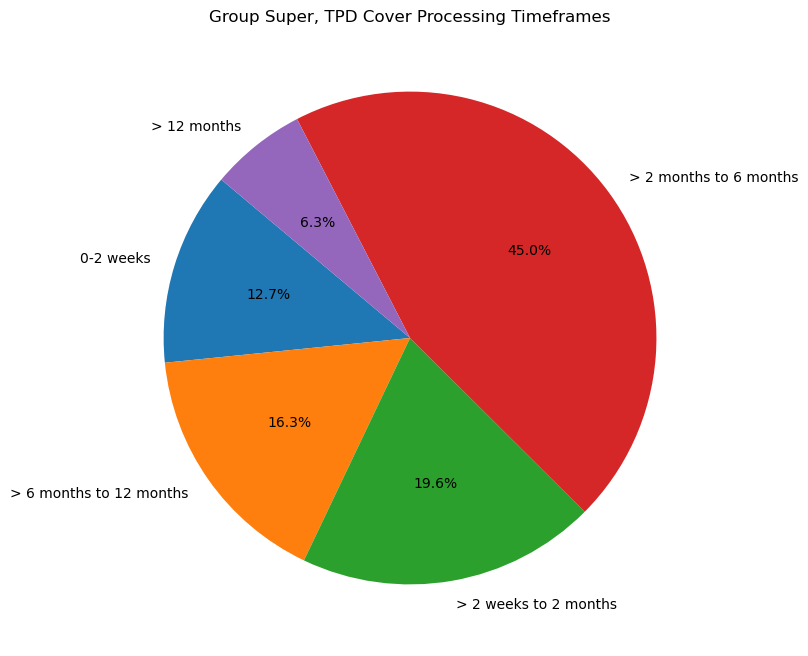

In [42]:
# plot the pie chart
plt.figure(figsize=(8, 8)) 
plt.pie(gs_tpd_df['Value'], labels=gs_tpd_df['Duration_bucket'], autopct='%1.1f%%', startangle=140)
plt.title('Group Super, TPD Cover Processing Timeframes')
plt.show()

In [26]:
# chart for companies that have the fastest processing times for death cover via the group super channel
death_df = current_df[
    current_df['Channel Type'].isin(['Group Super']) &
    current_df['Cover Type'].isin(['Death']) &
    current_df['Duration_bucket'].isin(['0-2 weeks'])
]
death_df= death_df[['Company Name', 'Duration_bucket', 'Value']]

#Remove Total from the df
death_df= death_df[death_df['Company Name'] !='Total']

#Sort in descending order
death_df = death_df.sort_values(by='Value', ascending=False)

death_df

,Company Name,Duration_bucket,Value
1425,Hannover Life Re of Australasia Ltd,0-2 weeks,88.7
2522,MLC Limited,0-2 weeks,86.9
2862,QInsure Limited,0-2 weeks,76.2
2090,MetLife Insurance Limited,0-2 weeks,75.1
3242,Resolution Life Australasia Limited,0-2 weeks,74.3
4329,TAL Life Limited,0-2 weeks,73.6
5265,Zurich Australia Limited,0-2 weeks,72.0
426,AIA Australia Limited,0-2 weeks,65.3


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Hannover Life Re of Australasia Ltd'),
  Text(1, 0, 'MLC Limited'),
  Text(2, 0, 'QInsure Limited'),
  Text(3, 0, 'MetLife Insurance Limited'),
  Text(4, 0, 'Resolution Life Australasia Limited'),
  Text(5, 0, 'TAL Life Limited'),
  Text(6, 0, 'Zurich Australia Limited'),
  Text(7, 0, 'AIA Australia Limited')])

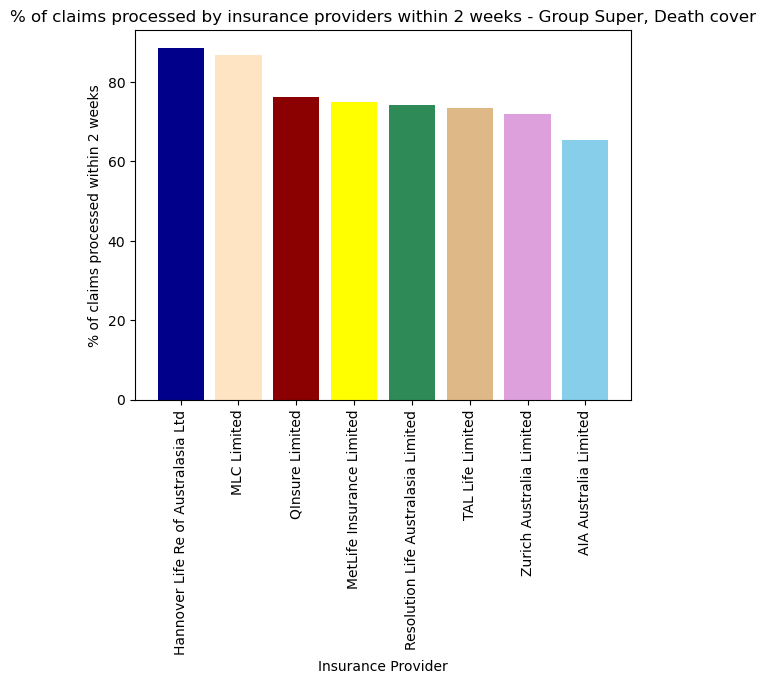

In [41]:
# bar graph for death claims processed within 2 weeks, by insurance provider
colours = ['darkblue','bisque','darkred', 'yellow', 'seagreen', 'burlywood', 'plum', 'skyblue']
plt.bar(death_df['Company Name'], death_df['Value'], color=colours)
plt.xlabel('Insurance Provider')
plt.ylabel('% of claims processed within 2 weeks')
plt.title('% of claims processed by insurance providers within 2 weeks - Group Super, Death cover')
plt.xticks(rotation=90)

# colours sourced from https://matplotlib.org/stable/gallery/color/named_colors.html


In [51]:
# chart for companies that have the slowest processing times for TPD cover via the indivdual advised channel
TPD_df = current_df[
    current_df['Channel Type'].isin(['Individual Advised']) &
    current_df['Cover Type'].isin(['TPD']) &
    current_df['Duration_bucket'].isin(['> 12 months'])
]
TPD_df= TPD_df[['Company Name', 'Duration_bucket', 'Channel Type' ,'Value']]

#Remove Total from the df
TPD_df= TPD_df[TPD_df['Company Name'] !='Total']

#Sort in descending order
TPD_df = TPD_df.sort_values(by='Value', ascending=False)

TPD_df

,Company Name,Duration_bucket,Channel Type,Value
3232,Resolution Life Australasia Limited,> 12 months,Individual Advised,18.6
416,AIA Australia Limited,> 12 months,Individual Advised,17.0
5255,Zurich Australia Limited,> 12 months,Individual Advised,16.9
2512,MLC Limited,> 12 months,Individual Advised,16.1
3915,TAL Life Insurance Services Limited,> 12 months,Individual Advised,15.5
4319,TAL Life Limited,> 12 months,Individual Advised,12.4


In [52]:
# chart for companies that have the slowest processing times for TPD cover via the group super channel
TPDGS_df = current_df[
    current_df['Channel Type'].isin(['Group Super']) &
    current_df['Cover Type'].isin(['TPD']) &
    current_df['Duration_bucket'].isin(['> 12 months'])
]
TPDGS_df= TPDGS_df[['Company Name', 'Duration_bucket', 'Channel Type' ,'Value']]

#Remove Total from the df
TPDGS_df= TPDGS_df[TPDGS_df['Company Name'] !='Total']

#Sort in descending order
TPDGS_df = TPDGS_df.sort_values(by='Value', ascending=False)

TPDGS_df

,Company Name,Duration_bucket,Channel Type,Value
3260,Resolution Life Australasia Limited,> 12 months,Group Super,16.5
444,AIA Australia Limited,> 12 months,Group Super,8.1
1443,Hannover Life Re of Australasia Ltd,> 12 months,Group Super,6.9
5283,Zurich Australia Limited,> 12 months,Group Super,6.6
4347,TAL Life Limited,> 12 months,Group Super,5.2
2108,MetLife Insurance Limited,> 12 months,Group Super,5.0
2540,MLC Limited,> 12 months,Group Super,4.8
2880,QInsure Limited,> 12 months,Group Super,3.4


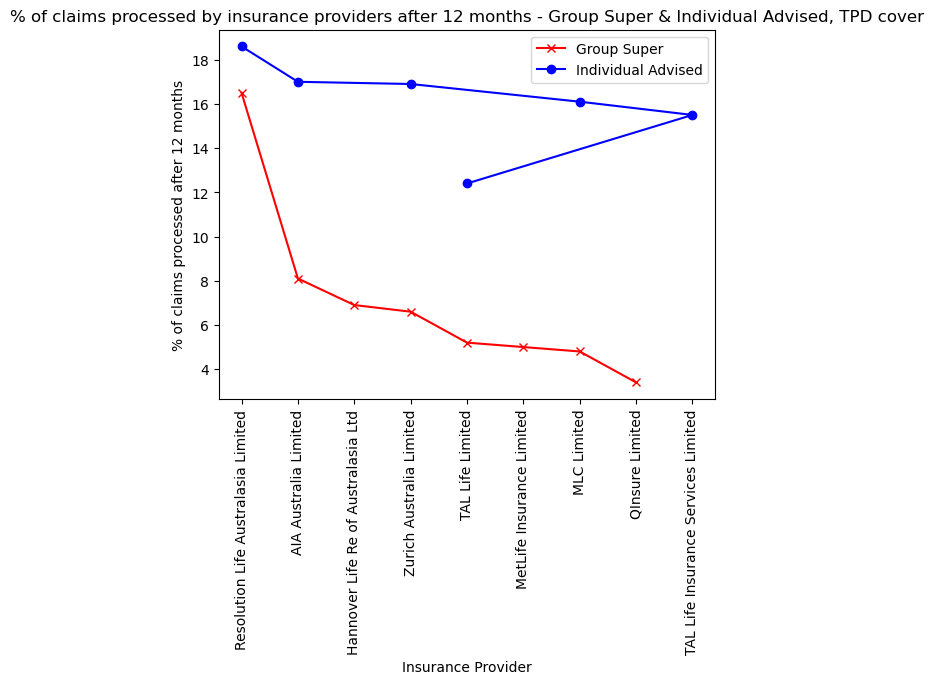

In [57]:
# bar graph for TPD claims processed after 12 months, by insurance provider
plt.plot(TPDGS_df['Company Name'], TPDGS_df['Value'], label='Group Super', color='red', marker='x')
plt.plot(TPD_df['Company Name'], TPD_df['Value'], label='Individual Advised', color='blue', marker='o')


plt.xlabel('Insurance Provider')
plt.ylabel('% of claims processed after 12 months')
plt.title('% of claims processed by insurance providers after 12 months - Group Super & Individual Advised, TPD cover')
plt.xticks(rotation=90)
plt.legend()
plt.show()



Modelling - Supervised ML

In [65]:
# Import the modules
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split


In [108]:
clean_df = clean_df[clean_df['Company Name'] !='Total']

# Separate the y variable, the labels
y = clean_df["Value"]

# Separate the X variable, the features
X = clean_df.drop(columns="Value")
X = pd.get_dummies(X)

X.head()

,Company Name_AIA Australia Limited,Company Name_Allianz Australia Life Insurance Limited,Company Name_Asteron Life & Superannuation Limited,Company Name_ClearView Life Assurance Limited,Company Name_H C F Life Insurance Company Pty Ltd,Company Name_Hallmark Life Insurance Company Ltd.,Company Name_Hannover Life Re of Australasia Ltd,Company Name_Integrity Life Australia Limited,Company Name_MLC Limited,Company Name_MetLife Insurance Limited,...,Cover Type_DII,Cover Type_Death,Cover Type_Funeral,Cover Type_TPD,Cover Type_Trauma,Duration_bucket_0-2 weeks,Duration_bucket_> 12 months,Duration_bucket_> 2 months to 6 months,Duration_bucket_> 2 weeks to 2 months,Duration_bucket_> 6 months to 12 months
349,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
350,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
351,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
352,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
353,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [117]:
#Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data using train_test_split
# Assign a random_state of 42 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'The mean squared error is: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

The mean squared error is: 273.48
R-squared Score: 0.42


In [120]:
# Random forest regression - code adapted from \
# https://medium.com/@bhatshrinath41/a-comprehensive-guide-to-random-forest-regression-43da559342bf

# Import required libraries
from sklearn.ensemble import RandomForestRegressor

# Split the data using train_test_split
# Assign a random_state of 42 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the regressor
regressor = RandomForestRegressor()

# Train the regressor on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'The mean squared error is: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')


The mean squared error is: 55.93
R-squared Score: 0.88


In [121]:
# Decision tree regression - code adapted from \
# https://medium.com/@theclickreader/decision-tree-regression-explained-with-implementation-in-python-1e6e48aa7a47
from sklearn.tree import DecisionTreeRegressor

# Split the data using train_test_split
# Assign a random_state of 42 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Regression model
regressordt = DecisionTreeRegressor(random_state=0)

# Train the Decision Tree Regression model to the data
regressordt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressordt.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'The mean squared error is: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

The mean squared error is: 59.50
R-squared Score: 0.87


In [127]:
# KNN regression
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model and set the number of neighbors to consider to 5
regressorknn = KNeighborsRegressor(n_neighbors=5)

# Train the model to the data
regressorknn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressorknn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'The mean squared error is: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')


The mean squared error is: 65.43
R-squared Score: 0.86


In [128]:
from joblib import dump
dump(regressor, 'rf_model.joblib')

['rf_model.joblib']

In [129]:
#Export the clean dataframe
clean_df.to_csv('clean_data.csv', index=False)